<a href="https://colab.research.google.com/github/Tanushreejaganathan/Sentiment_Analysis_tamil_tulu/blob/main/Tamillanguage_decisiontree_randomforest_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, log_loss
)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/traincl3.csv')
val_df = pd.read_csv('/content/drive/MyDrive/valcl3.csv')
test_df = pd.read_csv('/content/drive/MyDrive/testcl3.csv')

In [ ]:
print("\n Training Dataset Head:")
print(train_df.head(5))


 Training Dataset Head:
                                                Text          Label
0                  ennq idhu paei padama twist irkka       Positive
1  veriyanintha pakanum innu nenaichenahna pathut...  unknown_state
2           last shot apdiy moratu kaala paatha feel       Positive
3                     darbar motion poster see after  unknown_state
4                                              minut       Positive


In [ ]:
print("\nValidation Dataset Head:")
print(val_df.head(5))


Validation Dataset Head:
                                   Text           Label
0                            just reach  Mixed_feelings
1       massssssssssssssssssss overload        Positive
2             she look dummi mom gudiya        Positive
3  எநத டரலர சறநதத பசச வரபபம சகக பதவடஙகள  Mixed_feelings
4  adichi under wear oda vituruvean lol   unknown_state


In [ ]:
print("\nUnlabeled Test Dataset Head:")
print(test_df.head(5))



Unlabeled Test Dataset Head:
         Id                                               Text
0  SA_Ta_01                   thalaivan oruvan matum thalaivaa
1  SA_Ta_02              kandipaga tamilnadu arasiy kizhikaraa
2  SA_Ta_03  actinghaha over actinghahahahaaha hahahaha hah...
3  SA_Ta_04  உணமய பணண வடல சமமதககலன எனன அநத பணணககக உயரகடககற ...
4  SA_Ta_05  chiiiiiii mokka punda wigpathi sura next flop ...


In [ ]:
data_df = pd.concat([train_df, val_df])
text_column = 'Text'
label_column = 'Label'

X_train = data_df[text_column].fillna('').astype(str)
y_train = data_df[label_column]
X_test = test_df[text_column].fillna('').astype(str)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Decision Tree with GridSearchCV (Unigram Vectorizer)
print("Tuning Decision Tree...")
dt_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 1))
X_train_dt = dt_vectorizer.fit_transform(X_train)
X_test_dt = dt_vectorizer.transform(X_test)

dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_macro')
dt_grid.fit(X_train_dt, y_train)


Tuning Decision Tree...


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [ ]:
dt_best = dt_grid.best_estimator_
print("\nBest Parameters for Decision Tree:", dt_grid.best_params_)


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}


In [ ]:
# Random Forest with GridSearchCV
print("Tuning Random Forest...")
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, None], 'criterion': ['gini', 'entropy']}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3, scoring='f1_macro')
rf_grid.fit(X_train_tfidf, y_train)




Tuning Random Forest...


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None], 'n_estimators': [100, 200]},
             scoring='f1_macro')

In [ ]:
rf_best = rf_grid.best_estimator_
print("\nBest Parameters for Random Forest:", rf_grid.best_params_)



Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


In [ ]:
# K-Nearest Neighbors with GridSearchCV
print("Tuning K-Nearest Neighbors...")
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, scoring='f1_macro')
knn_grid.fit(X_train_tfidf, y_train)


Tuning K-Nearest Neighbors...


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [ ]:
knn_best = knn_grid.best_estimator_
print("\nBest Parameters for K-Nearest Neighbors:", knn_grid.best_params_)




Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}



Decision Tree Training Evaluation:
Accuracy: 0.9146
Log Loss: 0.1729
Precision (Macro): 0.8947
Recall (Macro): 0.8800
F1-Score (Macro): 0.8857
Classification Report:
                precision    recall  f1-score   support

Mixed_feelings       0.83      0.89      0.86      4134
      Negative       0.88      0.88      0.88      4631
      Positive       0.94      0.96      0.95     20417
 unknown_state       0.93      0.79      0.86      5783

      accuracy                           0.91     34965
     macro avg       0.89      0.88      0.89     34965
  weighted avg       0.92      0.91      0.91     34965



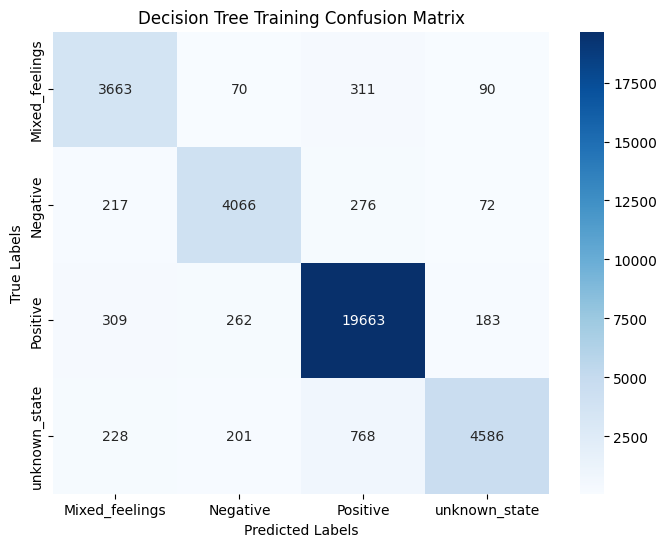


Random Forest Training Evaluation:
Accuracy: 0.9579
Log Loss: 0.2773
Precision (Macro): 0.9700
Recall (Macro): 0.9326
F1-Score (Macro): 0.9503
Classification Report:
                precision    recall  f1-score   support

Mixed_feelings       0.98      0.91      0.95      4134
      Negative       0.99      0.93      0.96      4631
      Positive       0.95      0.99      0.97     20417
 unknown_state       0.96      0.90      0.93      5783

      accuracy                           0.96     34965
     macro avg       0.97      0.93      0.95     34965
  weighted avg       0.96      0.96      0.96     34965



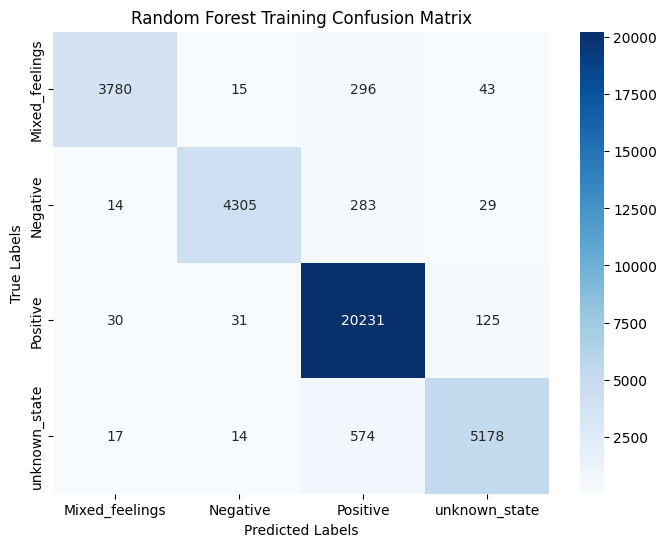


K-Nearest Neighbors Training Evaluation:
Accuracy: 0.9557
Log Loss: 0.7638
Precision (Macro): 0.9562
Recall (Macro): 0.9376
F1-Score (Macro): 0.9463
Classification Report:
                precision    recall  f1-score   support

Mixed_feelings       0.93      0.94      0.94      4134
      Negative       0.97      0.94      0.95      4631
      Positive       0.95      0.98      0.97     20417
 unknown_state       0.97      0.88      0.93      5783

      accuracy                           0.96     34965
     macro avg       0.96      0.94      0.95     34965
  weighted avg       0.96      0.96      0.96     34965



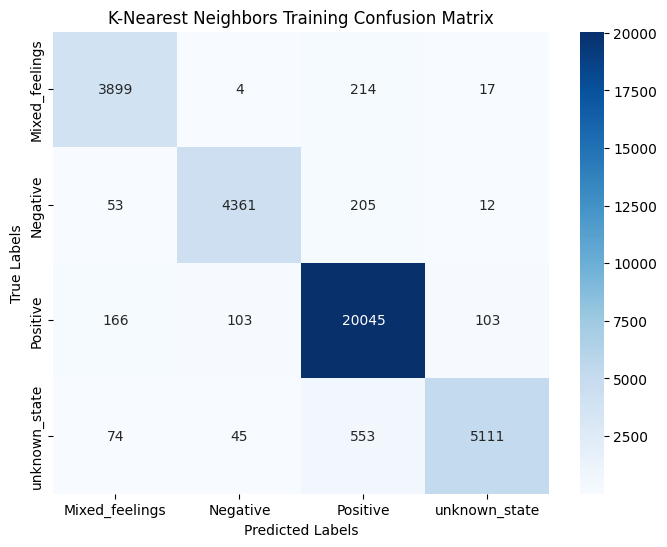

In [ ]:
# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to evaluate model performance
def evaluate_model(model, X, y, labels, dataset_name="Dataset"):
    predictions = model.predict(X)
    probabilities = model.predict_proba(X) if hasattr(model, 'predict_proba') else None
    acc = accuracy_score(y, predictions)
    prec = precision_score(y, predictions, average='macro')
    rec = recall_score(y, predictions, average='macro')
    f1 = f1_score(y, predictions, average='macro')
    print(f"\n{dataset_name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    if probabilities is not None:
        loss = log_loss(y, probabilities)
        print(f"Log Loss: {loss:.4f}")
    print(f"Precision (Macro): {prec:.4f}")
    print(f"Recall (Macro): {rec:.4f}")
    print(f"F1-Score (Macro): {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y, predictions))
    plot_confusion_matrix(y, predictions, labels, title=f"{dataset_name} Confusion Matrix")

# Extract class labels from data for plotting
class_labels = sorted(data_df[label_column].unique())

evaluate_model(dt_best, X_train_dt, y_train, class_labels, "Decision Tree Training")
evaluate_model(rf_best, X_train_tfidf, y_train, class_labels, "Random Forest Training")
evaluate_model(knn_best, X_train_tfidf, y_train, class_labels, "K-Nearest Neighbors Training")

In [ ]:
# Saving predictions for the test dataset

# Save Decision Tree predictions
decision_tree_output_csv_path = '/content/drive/MyDrive/test_predictions_decision_tree1.csv'
test_df['DecisionTree_Predictions'] = dt_best.predict(X_test_dt)
test_df[['DecisionTree_Predictions']].to_csv(decision_tree_output_csv_path, index=False, encoding='utf-8')
print(f"\nDecision Tree test predictions saved to {decision_tree_output_csv_path}")

# Save Random Forest predictions
random_forest_output_csv_path = '/content/drive/MyDrive/test_predictions_random_forest1.csv'
test_df['RandomForest_Predictions'] = rf_best.predict(X_test_tfidf)
test_df[['RandomForest_Predictions']].to_csv(random_forest_output_csv_path, index=False, encoding='utf-8')
print(f"\nRandom Forest test predictions saved to {random_forest_output_csv_path}")

# Save K-Nearest Neighbors predictions
knn_output_csv_path = '/content/drive/MyDrive/test_predictions_knn1.csv'
test_df['KNN_Predictions'] = knn_best.predict(X_test_tfidf)
test_df[['KNN_Predictions']].to_csv(knn_output_csv_path, index=False, encoding='utf-8')
print(f"\nK-Nearest Neighbors test predictions saved to {knn_output_csv_path}")



Decision Tree test predictions saved to /content/drive/MyDrive/test_predictions_decision_tree1.csv

Random Forest test predictions saved to /content/drive/MyDrive/test_predictions_random_forest1.csv

K-Nearest Neighbors test predictions saved to /content/drive/MyDrive/test_predictions_knn1.csv
